In [1]:
import os
import numpy as np
from scipy.spatial import distance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from mindstorm import dsmplot
from mindstorm import statplot
from tesser import tasks
from tesser import figures

main_dir = os.environ['TESSER_DIR']
data_dir = os.path.join(main_dir, 'Data')
fig_dir = os.path.join(main_dir, 'Figures', 'plots')

In [2]:
group = tasks.load_group(data_dir)
group.head()

,subject,dim1,dim2,node,community,node_type,connect
0,100,8,14,1,1,0,0
1,100,5,14,2,1,0,0
2,100,5,12,3,1,1,2
3,100,8,13,4,2,1,1
4,100,8,12,5,2,0,0


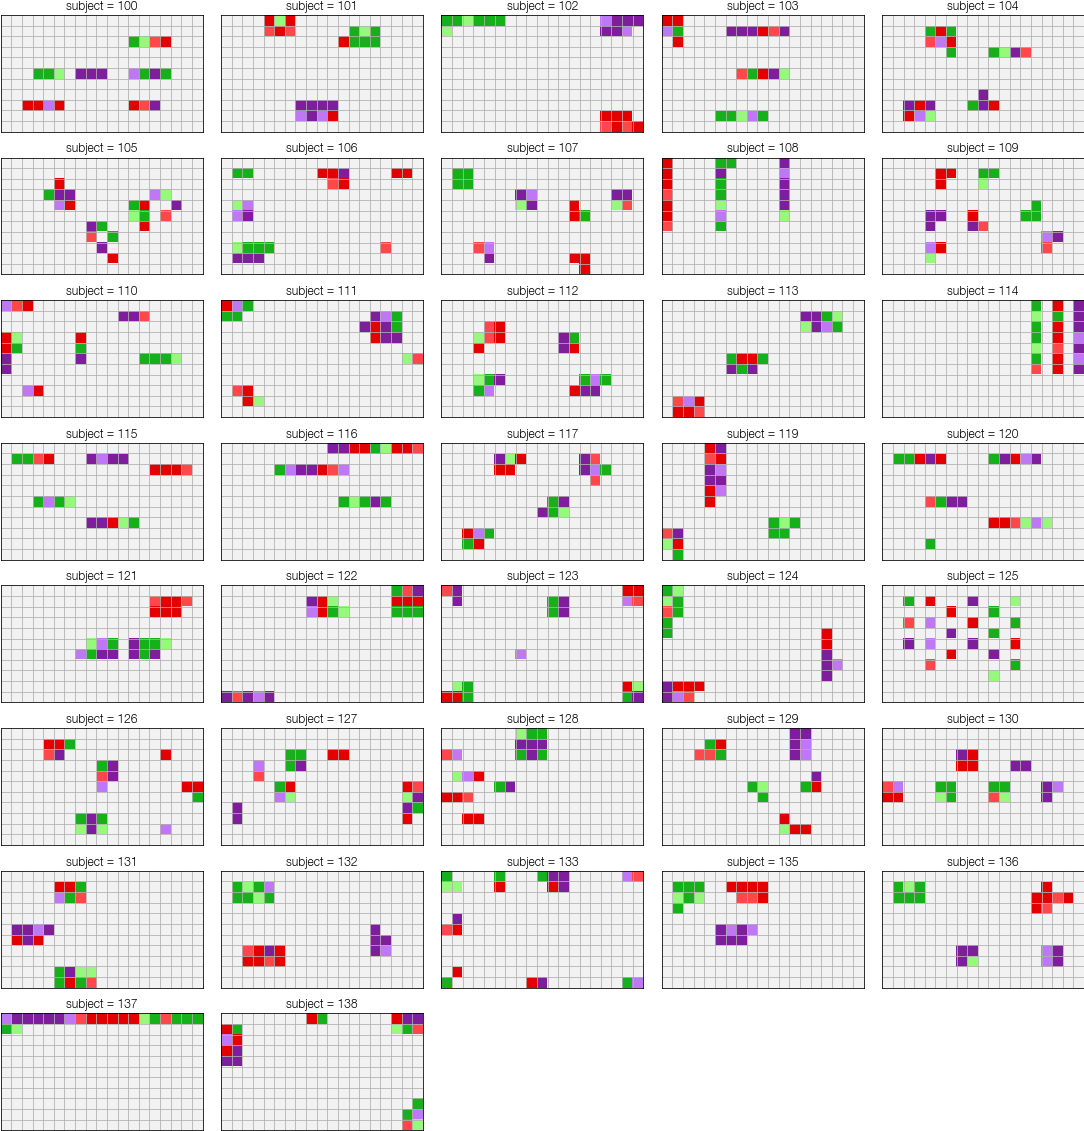

In [3]:
g = sns.FacetGrid(data=group, col='subject', col_wrap=5, aspect=17/11, height=2)
g.map_dataframe(figures.plot_group_mat);
g.savefig(os.path.join(fig_dir, 'grouping.pdf'))

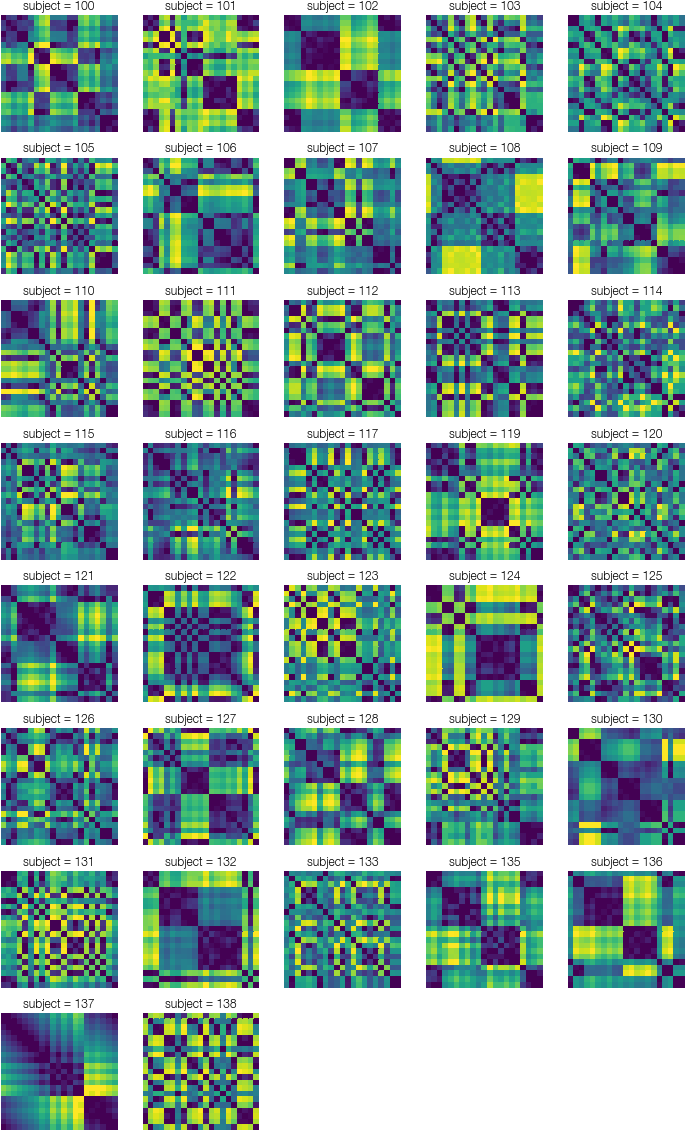

In [4]:
g = sns.FacetGrid(data=group, col='subject', col_wrap=5, height=2)
g.map_dataframe(dsmplot.plot_rep_as_dsm, distance='euclidean');
g.savefig(os.path.join(fig_dir, 'grouping_euclidean.pdf'))

In [5]:
res = tasks.group_distance(group)
pg.ttest(res['across'], res['within'], paired=True)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,4.554845,36,two-sided,0.000058,"[1.0, 2.61]",0.853919,406.56,0.999004


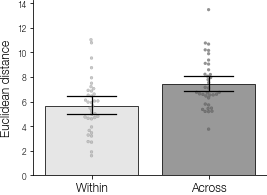

In [6]:
fig, ax = plt.subplots(figsize=(4, 3))
light = [(.9, .9, .9), (.6, .6, .6)]
dark = [(.7, .7, .7), (.4, .4, .4)]
flat = pd.melt(
    res, id_vars='subject', value_vars=['within', 'across'], var_name = 'pair', 
    value_name='distance'
)
statplot.plot_swarm_bar(flat, x='pair', y='distance', light=light, dark=dark, ax=ax)
ax.set(xticklabels=['Within', 'Across'], ylabel='Euclidean distance');
fig.savefig(os.path.join(fig_dir, 'grouping_distance.pdf'))

In [7]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.7.6
IPython version      : 7.11.1

matplotlib: 3.1.3
seaborn   : 0.11.1
mindstorm : 0.7.0
numpy     : 1.18.1
pingouin  : 0.3.11
tesser    : 0.1.0
pandas    : 1.0.1
scipy     : 1.4.1

